# Analyzing Police Activity with pandas

### Libraries and datasets

In [1]:
import pandas as pd

ri = pd.read_csv('datasets/police.csv')

## 1. Preparing the data for analysis

### Examining the dataset
Instructions:
<ul>
<li>Import pandas using the alias pd.</li>
<li>Read the file police.csv into a DataFrame named ri.</li>
<li>Examine the first 5 rows of the DataFrame (known as the "head").</li>
<li>Count the number of missing values in each column: Use .isnull() to check which DataFrame elements are missing, and then take the .sum() to count the number of True values in each column.</li>
</ul>

In [2]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('datasets/police.csv')

# Examine the head of the DataFrame
display(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


### Dropping columns
Instructions:
<ul>
<li>Examine the DataFrame's .shape to find out the number of rows and columns.</li>
<li>Drop both the county_name and state columns by passing the column names to the .drop() method as a list of strings.</li>
<li>Examine the .shape again to verify that there are now two fewer columns.</li>
</ul>

In [3]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 13)


### Dropping rows
Instructions:
<ul>
<li>Count the number of missing values in each column.</li>
<li>Drop all rows that are missing driver_gender by passing the column name to the subset parameter of .dropna().</li>
<li>Count the number of missing values in each column again, to verify that none of the remaining rows are missing driver_gender.</li>
<li>Examine the DataFrame's .shape to see how many rows and columns remain.</li>
</ul>

In [4]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


### Fixing a data type
Instructions:
<ul>
<li>Examine the head of the is_arrested column to verify that it contains True and False values and to check the column's data type.</li>
<li>Use the .astype() method to convert is_arrested to a bool column.</li>
<li>Check the new data type of is_arrested to confirm that it is now a bool column.</li>
</ul>

In [5]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


### Combining object columns
Instructions:
<ul>
<li>Use a string method to concatenate stop_date and stop_time (separated by a space), and store the result in combined.</li>
<li>Convert combined to datetime format, and store the result in a new column named stop_datetime.</li>
<li>Examine the DataFrame .dtypes to confirm that stop_datetime is a datetime column.</li>
</ul>

In [6]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


### Setting the index
Instructions:
<ul>
<li>Set stop_datetime as the DataFrame index.</li>
<li>Examine the index to verify that it is a DatetimeIndex.</li>
<li>Examine the DataFrame columns to confirm that stop_datetime is no longer one of the columns.</li>
</ul>

In [7]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


## 2. Exploring the relationship between gender and policing

### Examining traffic violations
Instructions:
<ul>
<li>Count the unique values in the violation column of the ri DataFrame, to see what violations are being committed by all drivers.</li>
<li>Express the violation counts as proportions of the total.</li>
</ul>

In [8]:
# Count the unique values in 'violation'
print(ri['violation'].value_counts())

# Express the counts as proportions
print(ri['violation'].value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


### Comparing violations by gender
Instructions:
<ul>
<li>Create a DataFrame, female, that only contains rows in which driver_gender is 'F'.</li>
<li>Create a DataFrame, male, that only contains rows in which driver_gender is 'M'.</li>
<li>Count the violations committed by female drivers and express them as proportions.</li>
<li>Count the violations committed by male drivers and express them as proportions.</li>
</ul>

In [9]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

# Compute the violations by female drivers (as proportions)
print(female['violation'].value_counts(normalize=True), "\n")

# Compute the violations by male drivers (as proportions)
print(male['violation'].value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64 

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


### Comparing speeding outcomes by gender
Instructions:
<ul>
<li>Create a DataFrame, female_and_speeding, that only includes female drivers who were stopped for speeding.</li>
<li>Create a DataFrame, male_and_speeding, that only includes male drivers who were stopped for speeding.</li>
<li>Count the stop outcomes for the female drivers and express them as proportions.</li>
<li>Count the stop outcomes for the male drivers and express them as proportions.</li>
</ul>

In [10]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri['driver_gender'] == 'F') & (ri['violation'] == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri['driver_gender'] == 'M') & (ri['violation'] == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding['stop_outcome'].value_counts(normalize=True), "\n")

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding['stop_outcome'].value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64 

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


### Calculating the search rate
Instructions:
<ul>
<li>Check the data type of search_conducted to confirm that it's a Boolean Series.</li>
<li>Calculate the search rate by counting the Series values and expressing them as proportions.</li>
<li>Calculate the search rate by taking the mean of the Series. (It should match the proportion of True values calculated above.)</li>
</ul>

In [11]:
# Check the data type of 'search_conducted'
print(ri['search_conducted'].dtype, "\n")

# Calculate the search rate by counting the values
print(ri['search_conducted'].value_counts(normalize=True), "\n")

# Calculate the search rate by taking the mean
print(ri['search_conducted'].mean())

bool 

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64 

0.0382153092354627


### Comparing search rates by gender
Instructions:
<ul>
<li>Filter the DataFrame to only include female drivers, and then calculate the search rate by taking the mean of search_conducted.</li>
<li>Filter the DataFrame to only include male drivers, and then repeat the search rate calculation.</li>
<li>Group by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)</li>
</ul>

In [12]:
# Calculate the search rate for female drivers
print(ri[ri['driver_gender'] == 'F'].search_conducted.mean())

# Calculate the search rate for male drivers
print(ri[ri['driver_gender'] == 'M'].search_conducted.mean(), "\n")

# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

0.019180617481282074
0.04542557598546892 

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


### Adding a second factor to the analysis
Instructions:
<ul>
<li>Use a .groupby() to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?</li>
<li>Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.</li>
</ul>

In [13]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation'])['search_conducted'].mean(), "\n")

# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender'])['search_conducted'].mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64 

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054

### Counting protective frisks
Instructions:
<ul>
<li>Count the search_type values in the ri DataFrame to see how many times "Protective Frisk" was the only search type.</li>
<li>Create a new column, frisk, that is True if search_type contains the string "Protective Frisk" and False otherwise.</li>
<li>Check the data type of frisk to confirm that it's a Boolean Series.</li>
<li>Take the sum of frisk to count the total number of frisks.</li>
</ul>

In [14]:
# Count the 'search_type' values
print(ri['search_type'].value_counts(), "\n")

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri['frisk'].dtype)

# Take the sum of 'frisk'
print(ri['frisk'].sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

### Comparing frisk rates by gender
Instructions:
<ul>
<li>Create a DataFrame, searched, that only contains rows in which search_conducted is True.</li>
<li>Take the mean of the frisk column to find out what percentage of searches included a frisk.</li>
<li>Calculate the frisk rate for each gender using a .groupby().</li>
</ul>

In [15]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri['search_conducted'] == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched['frisk'].mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender')['frisk'].mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


## 3. Visual exploratory data analysis

### Calculating the hourly arrest rate
Instructions:
<ul>
<li>Take the mean of the is_arrested column to calculate the overall arrest rate.</li>
<li>Group by the hour attribute of the DataFrame index to calculate the hourly arrest rate.</li>
<li>Save the hourly arrest rate Series as a new object, hourly_arrest_rate.</li>
</ul>

In [16]:
# Calculate the overall arrest rate
print(ri['is_arrested'].mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour)['is_arrested'].mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


### Plotting the hourly arrest rate
Instructions:
<ul>
<li>Import matplotlib.pyplot using the alias plt.</li>
<li>Create a line plot of hourly_arrest_rate using the .plot() method.</li>
<li>Label the x-axis as 'Hour', label the y-axis as 'Arrest Rate', and title the plot 'Arrest Rate by Time of Day'.</li>
<li>Display the plot using the .show() function.</li>
</ul>

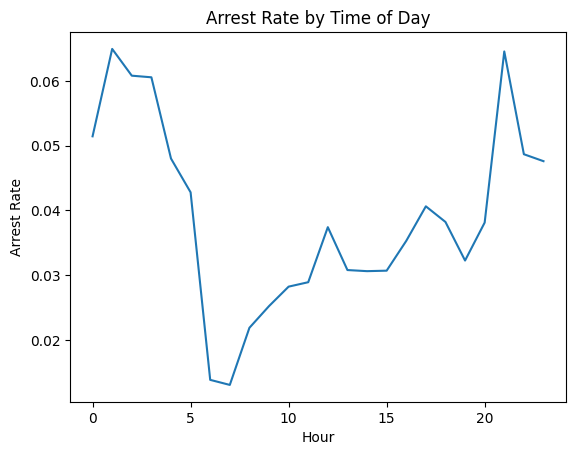

In [17]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

### Plotting drug-related stops
Instructions:
<ul>
<li>Calculate the annual rate of drug-related stops by resampling the drugs_related_stop column (on the 'A' frequency) and taking the mean.</li>
<li>Save the annual drug rate Series as a new object, annual_drug_rate.</li>
<li>Create a line plot of annual_drug_rate using the .plot() method.</li>
<li>Display the plot using the .show() function.</li>
</ul>

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


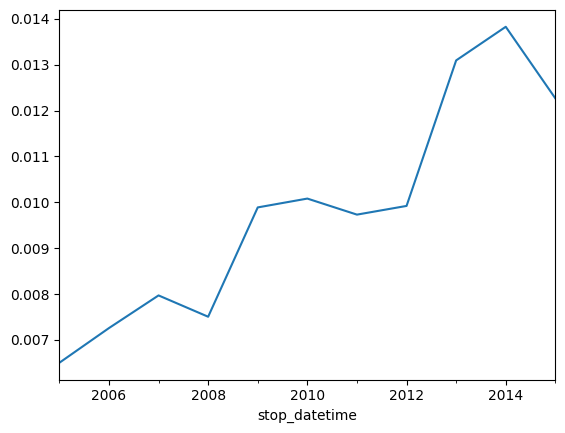

In [18]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

### Comparing drug and search rates
Instructions:
<ul>
<li>Calculate the annual search rate by resampling the search_conducted column, and save the result as annual_search_rate.</li>
<li>Concatenate annual_drug_rate and annual_search_rate along the columns axis, and save the result as annual.</li>
<li>Create subplots of the drug and search rates from the annual DataFrame.</li>
<li>Display the subplots.</li>
</ul>

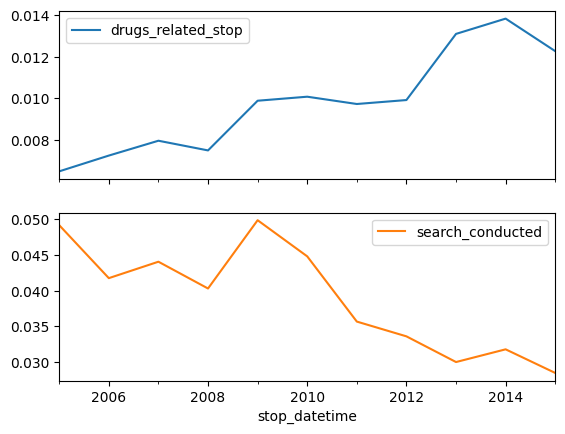

In [19]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

### Tallying violations by district
Instructions:
<ul>
<li>Create a frequency table from the ri DataFrame's district and violation columns using the pd.crosstab() function.</li>
<li>Save the frequency table as a new object, all_zones.</li>
<li>Select rows 'Zone K1' through 'Zone K3' from all_zones using the .loc[] accessor.</li>
<li>Save the smaller table as a new object, k_zones.</li>
</ul>

In [20]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri['district'], ri['violation']))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri['district'], ri['violation'])

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

### Plotting violations by district
Instructions:
<ul>
<li>Create a bar plot of k_zones.</li>
<li>Display the plot and examine it. What do you notice about each of the zones?</li>
<li>Create a stacked bar plot of k_zones.</li>
<li>Display the plot and examine it. Do you notice anything different about the data than you did previously?</li>
</ul>

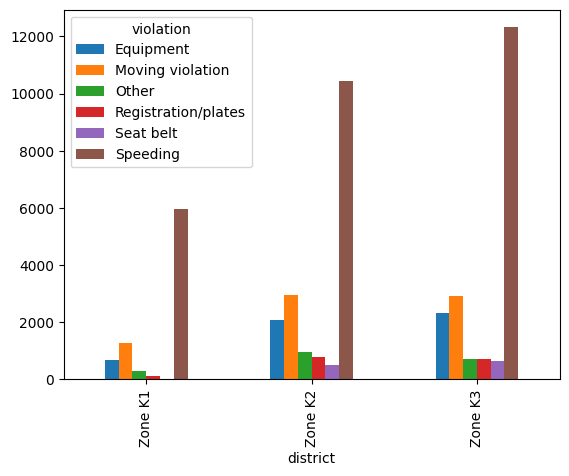

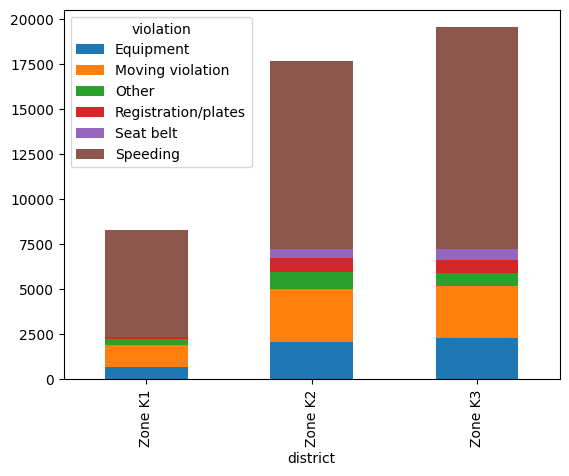

In [21]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

### Converting stop durations to numbers
Instructions:
<ul>
<li>Print the unique values in the stop_duration column. (This has been done for you.)</li>
<li>Create a dictionary called mapping that maps the stop_duration strings to the specified integers.</li>
<li>Convert the stop_duration strings to integers using the mapping, and store the results in a new column called stop_minutes.</li>
<li>Print the unique values in the stop_minutes column, to verify that the durations were properly converted to integers.</li>
</ul>

In [22]:
# Print the unique values in 'stop_duration'
print(ri['stop_duration'].unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri['stop_duration'].map(mapping)

# Print the unique values in 'stop_minutes'
print(ri['stop_minutes'].unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


### Plotting stop length
Instructions:
<ul>
<li>For each value in the ri DataFrame's violation_raw column, calculate the mean number of stop_minutes that a driver is detained.</li>
<li>Save the resulting Series as a new object, stop_length.</li>
<li>Sort stop_length by its values, and then visualize it using a horizontal bar plot.</li>
<li>Display the plot.</li>
</ul>

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


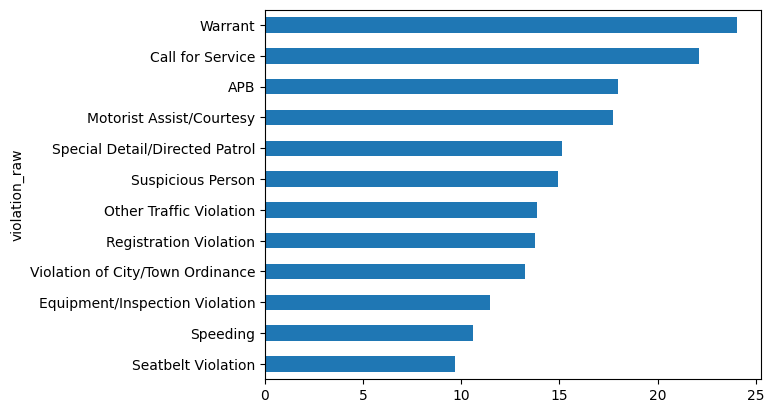

In [24]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw')['stop_minutes'].mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

## 4. Analyzing the effect of weather on policing